# Diagnosis Colon Cancer Using Deep Learning

This notebook will introduce some foundation machine learning and deep learning concepts by exploring the problem of diagnosis colon cancer.

## 1. Problem Definition

In our case, the problem we will be exploring is **Binary-Class Classification** 

This is because we're going to be using a **Histopathological Images** about a person to predict whether they have :

* **Colon benign tissue**
* **Colon adenocarcinoma**  


In a statement,

> Given histopathological images about a patient, can we diagnosis if he has colon Cancer or not?

## 2. Data

The original data came from the [Academic Torrents](https://academictorrents.com/details/7a638ed187a6180fd6e464b3666a6ea0499af4af) from Cornell University

Howevever, we've downloaded it from [Kaggle](https://www.kaggle.com/andrewmvd/lung-and-colon-cancer-histopathological-images).

Original Article :

 > Borkowski AA, Bui MM, Thomas LB, Wilson CP, DeLand LA, Mastorides SM. Lung and Colon Cancer Histopathological Image Dataset (LC25000). arXiv:1912.12142v1 [eess.IV], 2019

Relevant Links :

[arxiv](https://arxiv.org/abs/1912.12142v1) ,  [github](https://github.com/tampapath/lung_colon_image_set)

## 3. Evaluation

The evaluation metric is something you might define at the start of a project.

Since deep learning is very experimental, you might say something like, 

> IF we can reach 95% accuracy at predicting whether or not a patient has colon cancer during the proof of concept, we'll pursue this project.

## 4. Features

It may first be detected on **X-rays , CT scans** or other kinds of tests being done to check on another condition.

We will define every type of Colon cancer 

Incidence and Mortality

Estimated new cases and deaths from colon and rectal cancer in the United States in 2021[1]:



- New cases: 104,270 (colon cancer only).

- New cases of rectal cancer: 45,230.

- Deaths: 52,980 (colon and rectal cancers combined).

> Reference[1]: (American Cancer Society: Cancer Facts and Figures 2021. American Cancer Society, 2021. Available onlineExit Disclaimer.Last accessed January 12, 2021.)

  <img src="https://www.oncolink.org/var/ezdemo_site/storage/images/media/oncolink/images/megan-images/colon-anatomy/361120-1-eng-US/colon-anatomy.jpg" width=400/> 
  

1. **Colon benign tissue ==> colon_n :** 
            
     * A non-cancerous (benign) tumor of the colon is a growth that does not spread (metastasize) to other parts of the body.   Non-cancerous tumors are not usually life-threatening. Most non-cancerous tumors are polyps that are attached to the lining of the colon. They usually stick out from the lining and grow toward the hollow center of the colon.

     * Non-cancerous tumors of the colon are usually found during a colonoscopy or sigmoidoscopy. They are removed so they can be examined under a microscope to make a diagnosis. Surgery to remove them is the usual treatment.([cancer.ca](https://www.cancer.ca/en/cancer-information/cancer-type/colorectal/colorectal-cancer/non-cancerous-tumours/?region=on#:~:text=A%20non%2Dcancerous%20(benign),of%20the%20colon%20or%20rectum.))


2. **Colon adenocarcinoma ==> colon_aca :**

    * Most people who are diagnosed with colon cancer have a type called adenocarcinoma. There are other rarer tumor types too. These other types of colon cancer may be treated differently than adenocarcinoma. 
    
    * The vast majority of colon cancer is adenocarcinoma. This is a cancer of the cells that line the inside surface of the colon.([mskcc](https://www.mskcc.org/cancer-care/types/colon/types)) 
    * Make up about 70 percent of all polyps found in the colon. While adenomas can become cancerous, the process can typically take years.([2])
    
         > Reference [2]: Øines M, Helsingen LM, Bretthauer M, Emilsson L. Epidemiology and risk factors of colorectal polyps. Best Pract Res Clin Gastroenterol. 2017;31(4):419-424. doi:10.1016/j.bpg.2017.06.004

    * As opposed to hyperplastic polyps, adenomas are neoplastic. Neoplasia ("new growth") is a term used to describe an abnormal growth of cells that gradually lose the characteristics of normal cells. When neoplastic cells form into a mass, we refer to that as a tumor. A neoplasm can be benign, malignant, or something in between.
    

        
   

 ## 5. Preparing the tools
 
* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.
* [TensorFlow](https://www.tensorflow.org/) for bundles together Machine Learning and Deep Learning models and algorithms./Deep Learning Framework


In [1]:
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns
import tensorflow as tf
import os

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from tensorflow.keras.models import Sequential

## Layers
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout #for Overfiting Problem

## Preprocessing 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping #for Overfiting Problem
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model
from matplotlib.image import imread
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image


## Model evaluators
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

#Load Model
from tensorflow.keras.models import load_model

## 6. Load Data 

- This dataset contains **10,000 histopathological images** with 2 classes. All images are **768 x 768 pixels** in size and are in **jpeg** file format.
- The subfolder colon_image_sets contains two secondary subfolders: colon_aca subfolder with 5000 images of **colon  adenocarcinomas** and colon_n subfolder with 5000 images of **benign colonic tissues**.

- There are Tow classes in the dataset, each with 5,000 images, being :

    * **Colon benign tissue ==> colon_n**
    * **Colon adenocarcinoma ==> colon_aca**
   


In [2]:
#load data direction
data_dir = 'E:\\Final Project\\Diagnosis Colon Cancer\\colon_data_split'

In [3]:
#what our data include
os.listdir(data_dir)

['test', 'train', 'val']

In [4]:
train_data_dir = data_dir+'\\train\\'
val_data_dir = data_dir+'\\val\\'
test_data_dir = data_dir+'\\test\\'

In [5]:
os.listdir(train_data_dir)

['colon_aca', 'colon_n']

In [6]:
os.listdir(test_data_dir)

['colon_aca', 'colon_n']

In [7]:
os.listdir(val_data_dir)

['colon_aca', 'colon_n']

## 7.Preparing the Data

### 7.1 Data Augmentation

* We will increase the size of the image training dataset artificially by performing some Image Augmentation technique.

In [9]:
# Create Image Data Generator for Train Set
image_gen = ImageDataGenerator(
                               rescale=1./255,
                               shear_range=0.2,
                               zoom_range=0.2,
                               horizontal_flip=True
                              )

# Create Image Data Generator for Test/Validation Set
test_data_gen = ImageDataGenerator(rescale=1./255)

### 7.2 Loading the Images

In [28]:
train =image_gen.flow_from_directory(
                                     train_data_dir,
                                     target_size=(150,150),
                                     color_mode='rgb',
                                     class_mode='binary',
                                     batch_size=16
                                    )

test =test_data_gen.flow_from_directory(
                                         test_data_dir,
                                         target_size=(150,150),
                                         class_mode='binary',
                                         color_mode='rgb',
                                         batch_size=16,
                                         shuffle=False
                                        )
# setting shuffle as False just so we can later compare it 
# with predicted values without having indexing problem

valid =test_data_gen.flow_from_directory(
                                         val_data_dir,
                                         target_size=(150,150),
                                         class_mode='binary',
                                         color_mode='rgb',
                                         batch_size=16,
                                        )

Found 7000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [11]:
train.class_indices

{'colon_aca': 0, 'colon_n': 1}

### Look at some of the train set images

In [12]:
colon_aca_names = os.listdir(train_data_dir+'\\colon_aca\\')
colon_aca_names[:10]
colon_n_names = os.listdir(train_data_dir+'\\colon_n\\')
colon_n_names[:10]


['colonn100.jpeg',
 'colonn1000.jpeg',
 'colonn1001.jpeg',
 'colonn1002.jpeg',
 'colonn1003.jpeg',
 'colonn1004.jpeg',
 'colonn1005.jpeg',
 'colonn1006.jpeg',
 'colonn1007.jpeg',
 'colonn1008.jpeg']

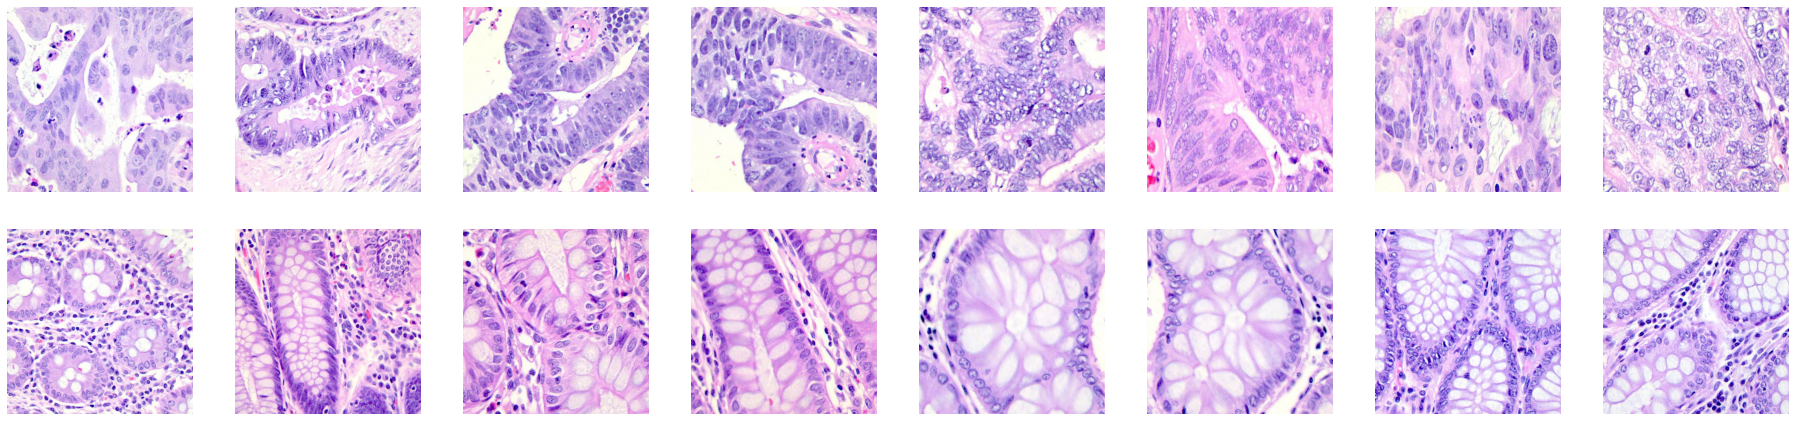

In [22]:
# parameters for the graph. The images will be in a 4x4 configuration
nrows = 8 
ncols = 8
pic_index = 0 #index for iterating over images
fig = plt.gcf() #set up matplotlib figure
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

colon_aca_pic = [os.path.join(train_data_dir+'\\colon_aca\\', fname) for fname in colon_aca_names[pic_index-8:pic_index]]
colon_n_pic = [os.path.join(train_data_dir+'\\colon_n\\', fname) for fname in colon_n_names[pic_index-8:pic_index]]

for i, img_path in enumerate(colon_aca_pic + colon_n_pic ):
    # setting up subplot. subplots start at index 1
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("off") #turning off axis. Don't show axis 
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

#0-colon adenocarcinoma 
#1-colon benign tissue

## 8.Convolutional Neural Network

- IT an Artificial Neural Network that has the ability to pin point or detect patterns in the images.
CNN architecture Example by [Wikimedia](https://commons.wikimedia.org/wiki/File:Typical_cnn.png)

<img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png" width=700/>



- Image to see how CCN work 

<img src="https://databricks.com/wp-content/uploads/2020/05/blog-convolutional-neural-network-6.png" width=700/>


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [13]:

#Define the model Layers (Define The model)
#model =Sequential() 

# first convolution
#model.add(Conv2D(32,(3,3),activation='relu', input_shape=(150, 150 ,3)))
#model.add(MaxPool2D(pool_size=(2,2)))

# second convolution
#model.add(Conv2D(32,(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

# Third convolution
#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

#model.add(Conv2D(64,(3,3),activation='relu'))
#model.add(MaxPool2D(pool_size=(2,2)))

# flatten before feeding into Dense neural network.
#model.add(Flatten())
          
# 512 neurons in the hidden layer          
#model.add(Dense(units =128,activation='relu'))
# 512 neurons in the hidden layer          
#model.add(Dense(units =64,activation='relu'))
          
#model.add(Dropout(rate=0.4))       
 
#model.add(Dense(units =1,activation='sigmoid'))

#Compiling the model

#model.compile(optimizer ='adam',
#                loss='binary_crossentropy',
 #               metrics=['accuracy'])


In [30]:
img_width =150 
img_height = 150

In [31]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Conv2D(64, (3, 3), activation="relu", input_shape=(img_width, img_height, 3)))
cnn.add(MaxPooling2D(pool_size = (2, 2)))
cnn.add(Flatten())
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'relu', units = 64))
cnn.add(Dense(activation = 'sigmoid', units = 1))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Getting a summary of the model built above.

In [32]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

## 8.1 Fit the model


In [35]:
#Defining Callback list
early = EarlyStopping(monitor='val_loss',patience=3,mode='min')

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose = 1,factor=0.3,min_ir =0.000001)

callbacks_list =[early,learning_rate_reduction]



In [36]:
from sklearn.utils.class_weight import compute_class_weight
weights = compute_class_weight('balanced', np.unique(train.classes), train.classes)
cw = dict(zip( np.unique(train.classes), weights))
print(cw)

{0: 1.0, 1: 1.0}


D:\anaconda3\envs\mytfenv\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[0 1], y=[0 0 0 ... 1 1 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [37]:
#Fit The model
#model.fit_generator(train,epochs=25,validation_data=valid,callbacks=callbacks_list)

cnn.fit(train,epochs=25, validation_data=valid, class_weight=cw, callbacks=callbacks_list)


Epoch 1/25
438/438 [==============================] - 289s 659ms/step - loss: 0.6913 - accuracy: 0.5394 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/25
438/438 [==============================] - 129s 295ms/step - loss: 0.6935 - accuracy: 0.5067 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/25
438/438 [==============================] - 131s 299ms/step - loss: 0.6355 - accuracy: 0.6369 - val_loss: 0.6840 - val_accuracy: 0.5265
Epoch 4/25
438/438 [==============================] - 130s 298ms/step - loss: 0.4231 - accuracy: 0.8040 - val_loss: 0.3795 - val_accuracy: 0.8350
Epoch 5/25
438/438 [==============================] - 131s 298ms/step - loss: 0.2939 - accuracy: 0.8740 - val_loss: 0.3111 - val_accuracy: 0.8650
Epoch 6/25
438/438 [==============================] - 288s 658ms/step - loss: 0.2232 - accuracy: 0.9101 - val_loss: 0.1783 - val_accuracy: 0.9325
Epoch 7/25
438/438 [==============================] - 188s 428ms/step - loss: 0.1760 - accuracy: 0.9340 - val_loss: 0.2064 -

#### After 20th epochs , loss: 3.27% - accuracy: 98.9% - val_loss =5.79% and val_accuracy = 98%.

<AxesSubplot:>

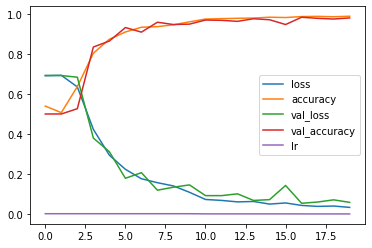

In [38]:
pd.DataFrame(cnn.history.history).plot()

## 9.Evaluate

In [40]:
#Display Data Frame , to show result 
losses = pd.DataFrame(cnn.history.history)
losses

,loss,accuracy,val_loss,val_accuracy,lr
0,0.691266,0.539429,0.693110,0.5000,0.001000
1,0.693458,0.506714,0.692337,0.5000,0.001000
2,0.635457,0.636857,0.683994,0.5265,0.001000
3,0.423120,0.804000,0.379537,0.8350,0.001000
4,0.293858,0.874000,0.311114,0.8650,0.001000
5,0.223192,0.910143,0.178301,0.9325,0.001000
6,0.176047,0.934000,0.206436,0.9095,0.001000
7,0.156264,0.937000,0.118694,0.9590,0.001000
8,0.139996,0.946143,0.133726,0.9475,0.001000
9,0.108197,0.961000,0.145193,0.9495,0.001000


#### Display some graphs to see if model work good in training or not

<AxesSubplot:>

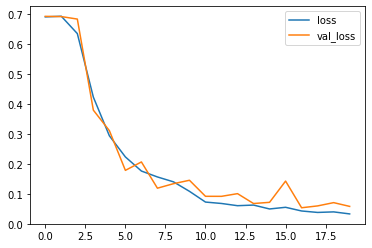

In [41]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

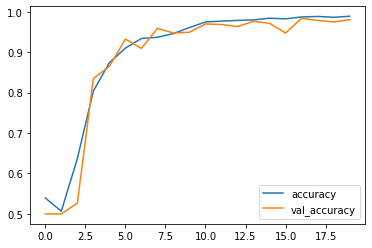

In [42]:
losses[['accuracy','val_accuracy']].plot()

In [52]:
test_accu = cnn.evaluate(test)
print('The testing accuracy is :',test_accu[1]*100, '%')

63/63 [==============================] - 8s 125ms/step - loss: 0.0421 - accuracy: 0.9840
The testing accuracy is : 98.4000027179718 %


In [53]:
preds = cnn.predict(test,verbose=1)

63/63 [==============================] - 10s 156ms/step


In [54]:
predictions = preds.copy()
predictions[predictions <= 0.5] = 0
predictions[predictions > 0.5] = 1

### 9.1 Evaluating our model with Data that he didn't see before

### Classification Report

We can make a classification report using [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) and passing it the true labels as well as our models predicted labels.

A classification report will also give us information of the precision and recall of our model for each class.

In [66]:
print(classification_report(y_true=test.classes,y_pred=predictions,target_names =['adenocarcinoma','benign']))

                precision    recall  f1-score   support

adenocarcinoma       1.00      0.97      0.98       500
        benign       0.97      1.00      0.98       500

      accuracy                           0.98      1000
     macro avg       0.98      0.98      0.98      1000
  weighted avg       0.98      0.98      0.98      1000



* **Precision** - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
* **Recall** - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
* **F1 score** - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
* **Support** - The number of samples each metric was calculated on.
* **Accuracy** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
* **Macro avg** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn’t class imbalance into effort, so if you do have class imbalances, pay attention to this metric.
* **Weighted avg** - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

### Confusion Matrix

A confusion matrix is a visual way to show where your model made the right predictions and where it made the wrong predictions (or in other words, got confused).


<AxesSubplot:>

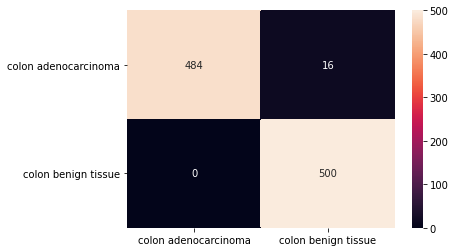

In [71]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(test.classes, predictions, labels=[0, 1]),index=["colon adenocarcinoma", "colon benign tissue"],
columns=["colon adenocarcinoma", "colon benign tissue"])
import seaborn as sns
sns.heatmap(cm,annot=True,fmt="d")

In [62]:
#Save The Model 
cnn.save("colon_cancer_3.h5")

### 9.2 Predict Some Images :

 
 * Index 0 =colon adenocarcinoma ==> colon_aca
 * Index 1 =colon benign tissue ==> colon_n


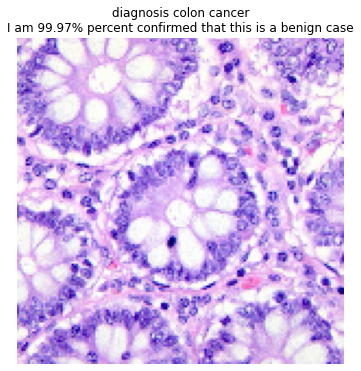

In [67]:
# Index 1 =colon benign tissue ==> colon_n

# Testing diagnosis colon cancer
img_path ="E:\\Final Project\\Diagnosis Colon Cancer\\colon_data_split\\test\\colon_n\\colonn18.jpeg"
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(img_path, target_size=(150, 150),color_mode='rgb')
# Preprocessing the image
c_c_img = image.img_to_array(hardik_img)
c_c_img = c_c_img/255
c_c_img = np.expand_dims(c_c_img, axis=0)
#predict
diagnosis_colon_cancer= cnn.predict(c_c_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if diagnosis_colon_cancer>= 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a benign case'.format(diagnosis_colon_cancer[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a adenocarcinoma case'.format(1-diagnosis_colon_cancer[0][0]))
plt.title("diagnosis colon cancer\n"+out)  
plt.imshow(np.squeeze(c_c_img))
plt.show()


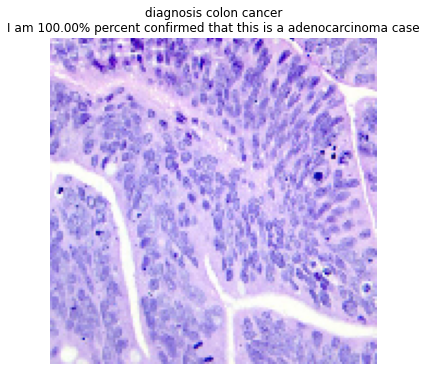

In [68]:
# Index 0 =colon adenocarcinoma  ==> colon_aca

# Testing diagnosis colon cancer
img_path ="E:\\Final Project\\Diagnosis Colon Cancer\\colon_data_split\\test\\colon_aca\\colonca759.jpeg"
from tensorflow.keras.preprocessing import image
hardik_img = image.load_img(img_path, target_size=(150, 150),color_mode='rgb')
# Preprocessing the image
c_c_img = image.img_to_array(hardik_img)
c_c_img = c_c_img/255
c_c_img = np.expand_dims(c_c_img, axis=0)
#predict
diagnosis_colon_cancer= cnn.predict(c_c_img)
#print
plt.figure(figsize=(6,6))
plt.axis('off')
if diagnosis_colon_cancer>= 0.5: 
    out = ('I am {:.2%} percent confirmed that this is a benign case'.format(diagnosis_colon_cancer[0][0]))
    
else: 
    out = ('I am {:.2%} percent confirmed that this is a adenocarcinoma case'.format(1-diagnosis_colon_cancer[0][0]))
plt.title("diagnosis colon cancer\n"+out)  
plt.imshow(np.squeeze(c_c_img))
plt.show()


## 10. Load Model 

In [69]:
#Load Model
model_dir= 'colon_cancer_3.h5'

# loading using .h5 file
new_colon_model = tf.keras.models.load_model(
    "colon_cancer_3.h5",
    custom_objects=None,
    compile=True)

In [70]:
loss,acc = new_colon_model.evaluate(test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

63/63 - 8s - loss: 0.0421 - accuracy: 0.9840
Restored model, accuracy: 98.40%
